In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
spark = SparkSession.builder.appName('yelp_data_exploration').getOrCreate()


In [2]:
yelp_review = spark.read.csv('review.csv',inferSchema=True,header=True)
yelp_business = spark.read.csv('business.csv',inferSchema=True,header=True)
yelp_user = spark.read.csv('user.csv',inferSchema=True,header=True)


In [3]:
yelp_user.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: integer (nullable = true)
 |-- compliment_cute: integer (nullable = true)
 |-- compliment_funny: integer (nullable = true)
 |-- compliment_hot: integer (nullable = true)
 |-- compliment_list: integer (nullable = true)
 |-- compliment_more: integer (nullable = true)
 |-- compliment_note: integer (nullable = true)
 |-- compliment_photos: integer (nullable = true)
 |-- compliment_plain: integer (nullable = true)
 |-- compliment_profile: integer (nullable = true)
 |-- compliment_writer: integer (nullable = true)
 |-- cool: integer (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: integer (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: integer (nullable = true)
 |-- useful: integer (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



In [4]:
yelp_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: string (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: string (nullable = true)
 |-- user_id: string (nullable = true)



In [5]:
yelp_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- city: string (nullable = true)
 |-- is_open: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- name: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- review_count: integer (nullable = true)
 |-- stars: double (nullable = true)
 |-- state: string (nullable = true)
 |-- attributes-AcceptsInsurance: string (nullable = true)
 |-- attributes-AgesAllowed: string (nullable = true)
 |-- attributes-Alcohol: string (nullable = true)
 |-- attributes-Ambience: string (nullable = true)
 |-- attributes-BYOB: string (nullable = true)
 |-- attributes-BYOBCorkage: string (nullable = true)
 |-- attributes-BestNights: string (nullable = true)
 |-- attributes-BikeParking: string (nullable = true)
 |-- attributes-BusinessAcceptsBitcoin: string (nullable = true)
 |-- attributes-BusinessAccep

In [6]:
#yelp_business.show(5)

# Showing The Top Reviewed Business has more than 3 Stars

In [43]:
top_stars = yelp_business.filter('stars >3 ').sort('review_count',ascending=False)
#top_stars.show(5)

Text(0.5, 1.0, 'Top Reviewied Business')

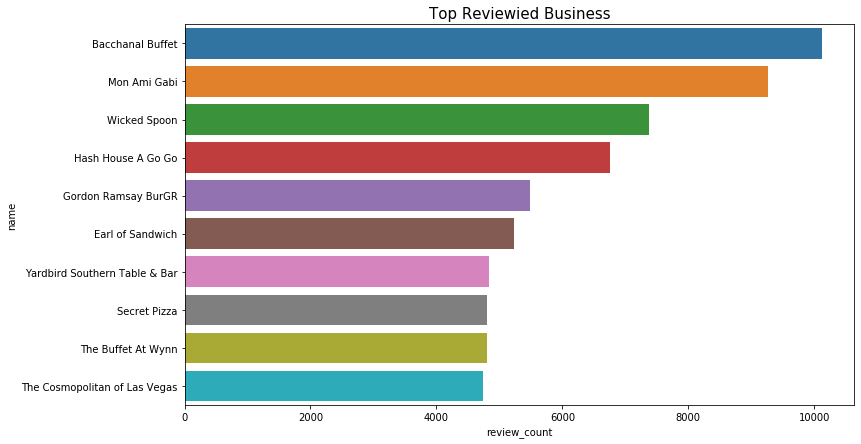

In [8]:
df_top_stars = top_stars.limit(10).toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='name',x='review_count',data=df_top_stars)

plt.title('Top Reviewied Business', fontsize=15)

# Showing Top 10 category which has most business count

In [9]:
from pyspark.sql.functions import split,explode


In [10]:
category = yelp_business.select('categories')
individual_category = category.select(explode(split('categories', ', ')).alias('category'))
grouped_category = individual_category.groupby('category').count()
top_category = grouped_category.sort('count',ascending=False)
top_category.show(5)

+-------------+-----+
|     category|count|
+-------------+-----+
|  Restaurants|63944|
|     Shopping|34644|
|         Food|32991|
|Home Services|22487|
|Beauty & Spas|20520|
+-------------+-----+
only showing top 5 rows



Text(0.5, 1.0, ' Top 10 category')

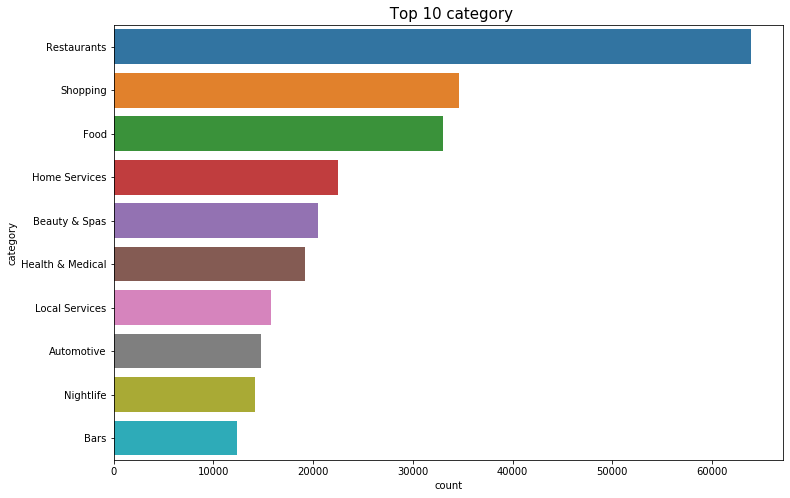

In [11]:
df_top_category = top_category.limit(10).toPandas()
plt.figure(figsize=(12,8))
sns.barplot(y='category',x='count',data=df_top_category)
plt.title(' Top 10 category', fontsize=15)

# Top Alcohol Business

Text(0.5, 1.0, 'Top Alcohol Business')

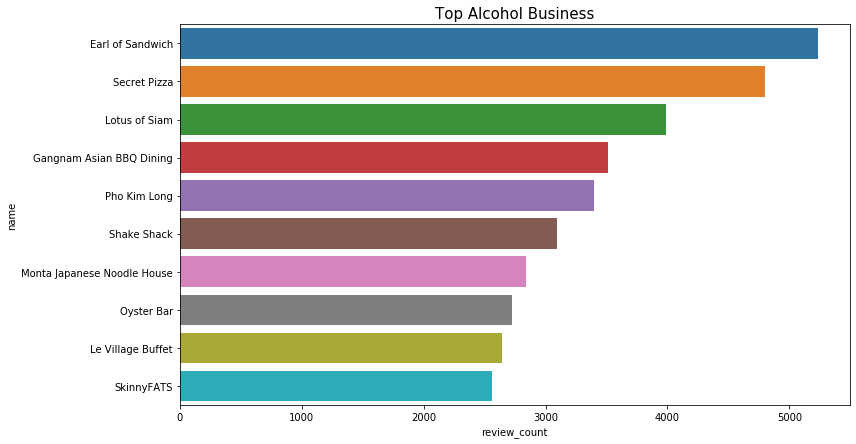

In [61]:
top_Alcohol = top_stars.filter(yelp_business['attributes-Alcohol'].contains('beer') ).sort('review_count',ascending=False)
top_Alcohol = top_Alcohol.limit(10).toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='name',x='review_count',data=top_Alcohol)

plt.title('Top Alcohol Business', fontsize=15)
#df_top_stars.head()

# Top DogsAllowed

Text(0.5, 1.0, 'Top DogsAllowed Business')

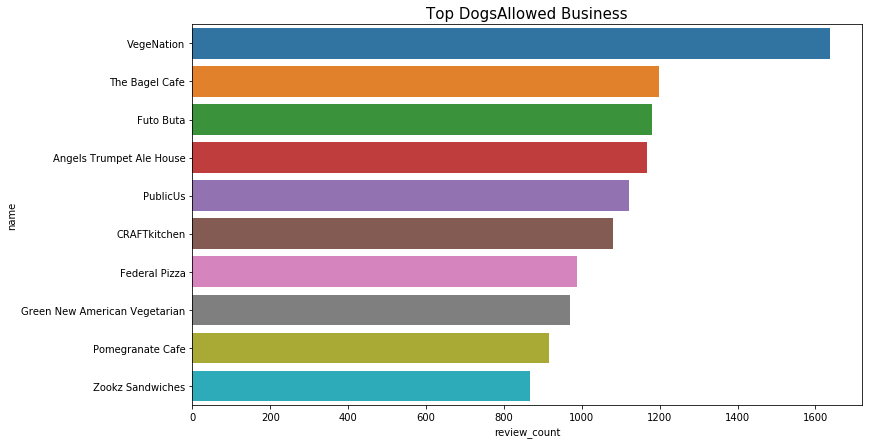

In [62]:
DogsAllowed = top_stars.filter(yelp_business['attributes-DogsAllowed'].contains('True') ).sort('review_count',ascending=False)
DogsAllowed = DogsAllowed.limit(10).toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='name',x='review_count',data=DogsAllowed)

plt.title('Top DogsAllowed Business', fontsize=15)
#df_top_stars.head()

# Top Rating give by User to business

In [12]:
rating = yelp_business.select('stars')
group_rating = rating.groupby('stars').count()
rating_top = group_rating.sort('count',ascending=False)
rating_top.show(truncate=False)

+-----+-----+
|stars|count|
+-----+-----+
|4.0  |39199|
|3.5  |38079|
|4.5  |29940|
|3.0  |28634|
|5.0  |27080|
|2.5  |21435|
|2.0  |13124|
|1.5  |6004 |
|1.0  |5898 |
+-----+-----+



Text(0.5, 1.0, ' Top Users Ratings')

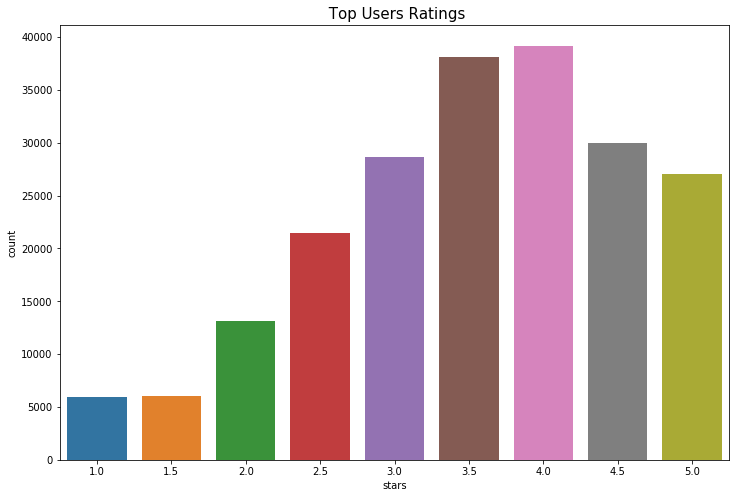

In [13]:
df_rating_top = rating_top.limit(10).toPandas()
plt.figure(figsize=(12,8))
sns.barplot(y='count',x='stars',data=df_rating_top)
plt.title(' Top Users Ratings', fontsize=15)

# Top Locations who have number of business more in world

In [14]:
locations = yelp_business.select('business_id','city')
review_city = yelp_review.select('business_id')
merge_city = locations.join(review_city,'business_id','inner')
grouped_review_city = merge_city.groupby('city').count()
most_reviewed_city = grouped_review_city.groupby('city').sum()
num_business=  most_reviewed_city.sort('sum(count)',ascending=False)

In [15]:
num_business.show(2)

+---------+----------+
|     city|sum(count)|
+---------+----------+
|Las Vegas|     51909|
|  Phoenix|     17762|
+---------+----------+
only showing top 2 rows



Text(0.5, 1.0, 'Number of all Business in every City')

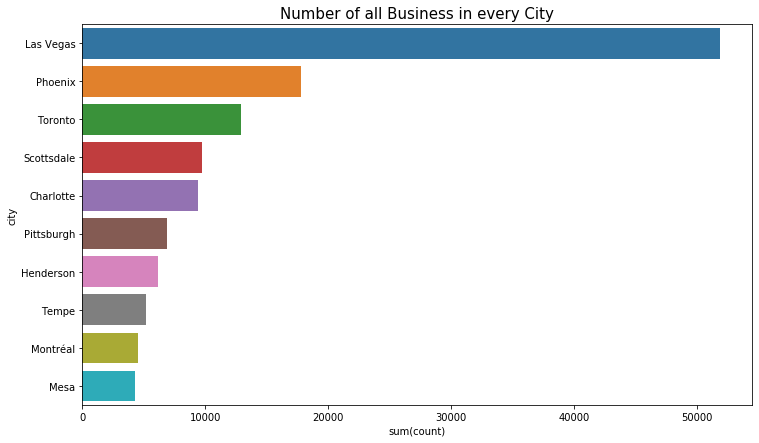

In [16]:
df_num_business = num_business.limit(10).toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='city',x='sum(count)',data=df_num_business)
plt.title('Number of all Business in every City', fontsize=15)

# As the most reviewed business is Resturant so we are interest to know number of resturant in every city

Text(0.5, 1.0, 'Number of Restaurants in every City')

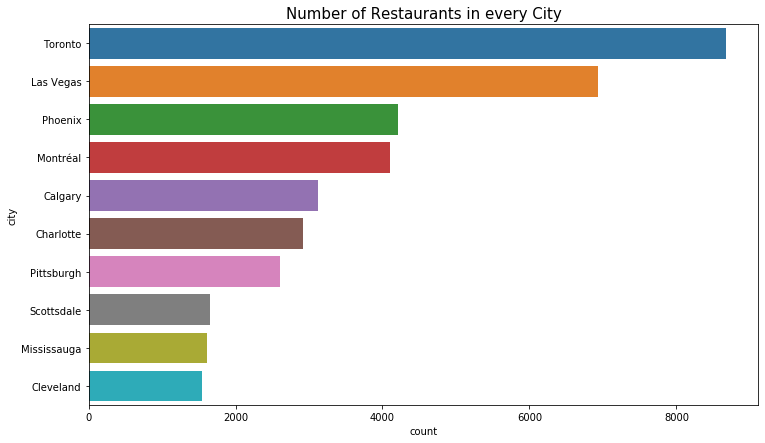

In [17]:
_restaurants = yelp_business.filter(yelp_business['categories'].contains('Restaurants'))
restaurants_city = _restaurants.groupby('city').count()
num_restaurants=  restaurants_city.sort('count',ascending=False)
df_num_restaurants = num_restaurants.limit(10).toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='city',x='count',data=df_num_restaurants)
plt.title('Number of Restaurants in every City', fontsize=15)

# Top Stared Business in Geo Map

In [18]:
import plotly.express as px
df_locations = top_stars.limit(500).toPandas()
px.set_mapbox_access_token('pk.eyJ1IjoiYmVzaGdtbCIsImEiOiJja2FtNzNwZDYxMWNrMnpwNjhocnNmNmU5In0.34ej5grMxq6YSys2xg1zYg')
fig = px.scatter_mapbox(df_locations, lat='latitude',lon='longitude',
                     hover_name="name", zoom=2, height=500, size ='review_count', color = 'city')
#fig.show()

# Top Reviewing users

In [19]:
top_users = yelp_user.sort('review_count',ascending=False).select('name','review_count')


Text(0.5, 1.0, 'Top Reviewing users')

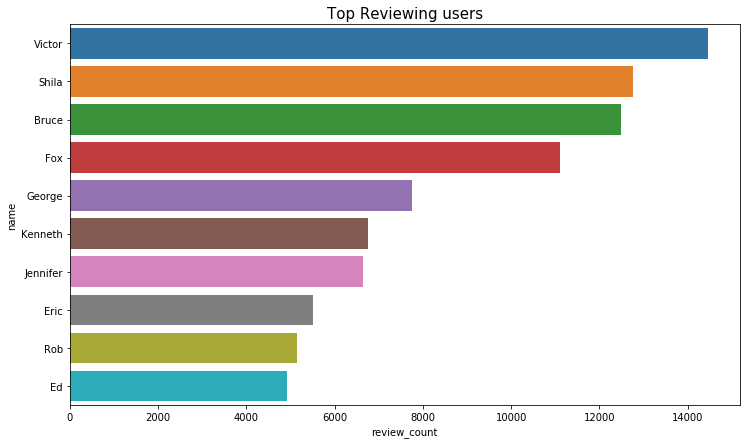

In [20]:
df_top_users = top_users.limit(10).toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='name',x='review_count',data=df_top_users)

plt.title('Top Reviewing users', fontsize=15)

# number of useful votes sent by the user

Text(0.5, 1.0, 'number of useful votes sent by the user')

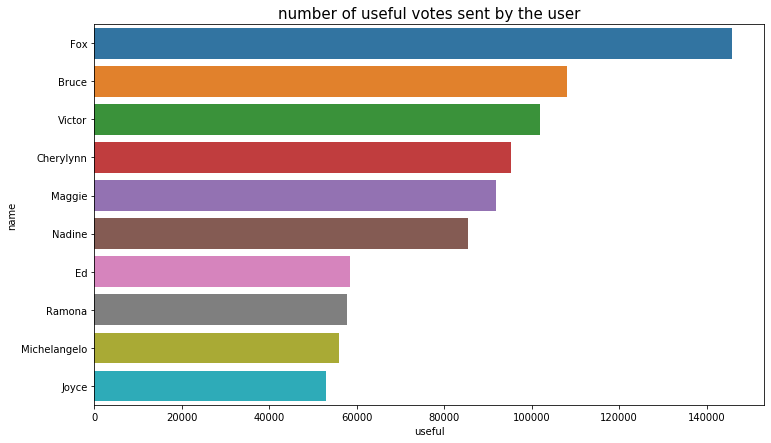

In [22]:
df_top_users = yelp_user.select('name','useful').sort('useful',ascending=False).limit(10).toPandas()

plt.figure(figsize=(12,7))
sns.barplot(y='name',x='useful',data=df_top_users)

plt.title('number of useful votes sent by the user', fontsize=15)

# number of funny votes sent by the user

Text(0.5, 1.0, 'number of funny votes sent by the user')

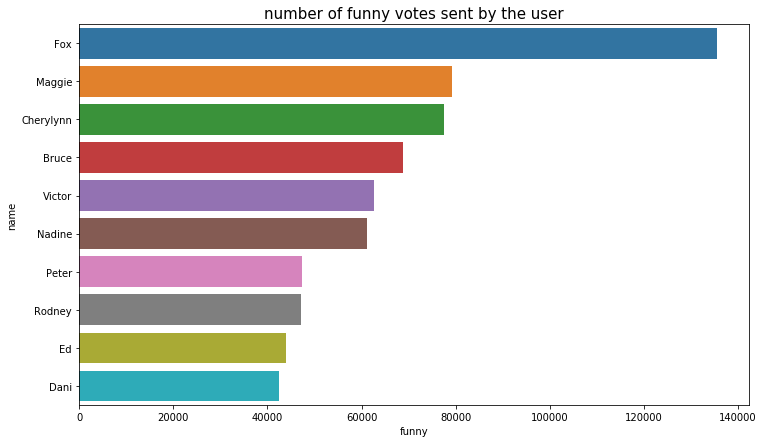

In [23]:
df_top_users = yelp_user.select('name','funny').sort('funny',ascending=False).limit(10).toPandas()

plt.figure(figsize=(12,7))
sns.barplot(y='name',x='funny',data=df_top_users)

plt.title('number of funny votes sent by the user', fontsize=15)

# number of cool votes sent by the user

Text(0.5, 1.0, 'number of cool votes sent by the user')

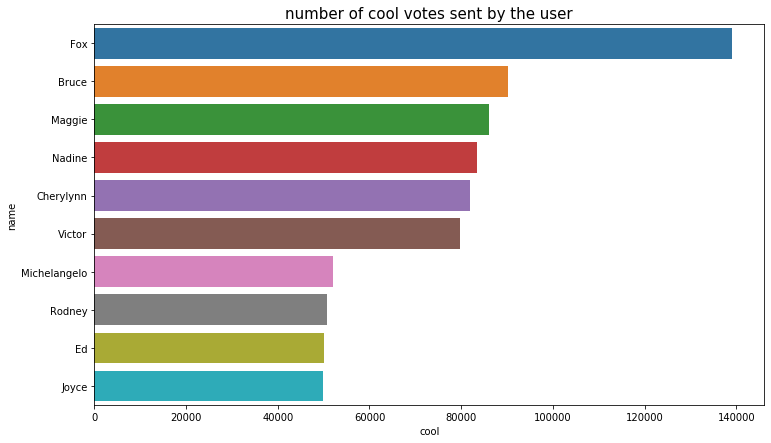

In [24]:
df_top_users = yelp_user.select('name','cool').sort('cool',ascending=False).limit(10).toPandas()

plt.figure(figsize=(12,7))
sns.barplot(y='name',x='cool',data=df_top_users)

plt.title('number of cool votes sent by the user', fontsize=15)

# number of fans votes sent by the user

Text(0.5, 1.0, 'number of cool fans sent by the user')

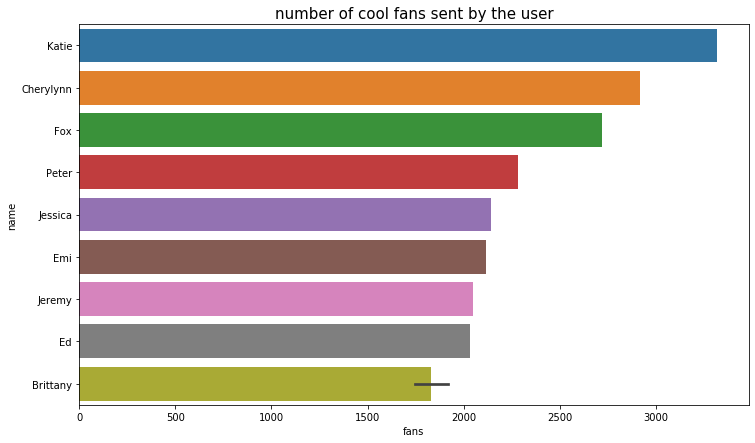

In [25]:
df_top_users = yelp_user.select('name','fans').sort('fans',ascending=False).limit(10).toPandas()

plt.figure(figsize=(12,7))
sns.barplot(y='name',x='fans',data=df_top_users)

plt.title('number of cool fans sent by the user', fontsize=15)

# number of compliment_hot votes sent by the user

Text(0.5, 1.0, 'number of cool compliment_hot sent by the user')

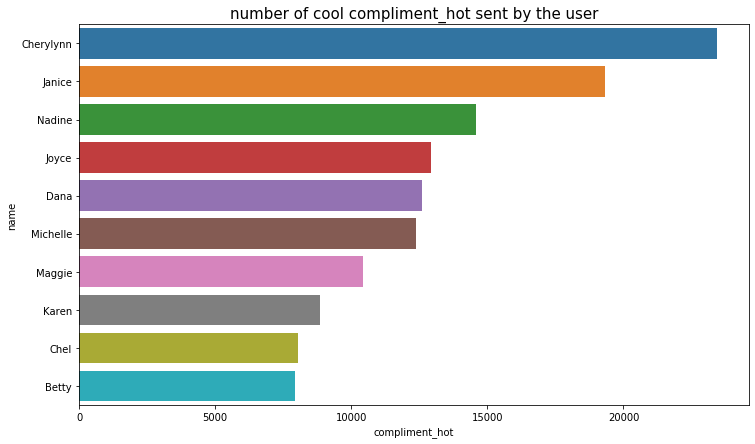

In [26]:
df_top_users = yelp_user.select('name','compliment_hot').sort('compliment_hot',ascending=False).limit(10).toPandas()

plt.figure(figsize=(12,7))
sns.barplot(y='name',x='compliment_hot',data=df_top_users)

plt.title('number of cool compliment_hot sent by the user', fontsize=15)

Text(0.5, 1.0, 'Number of new users by evry year')

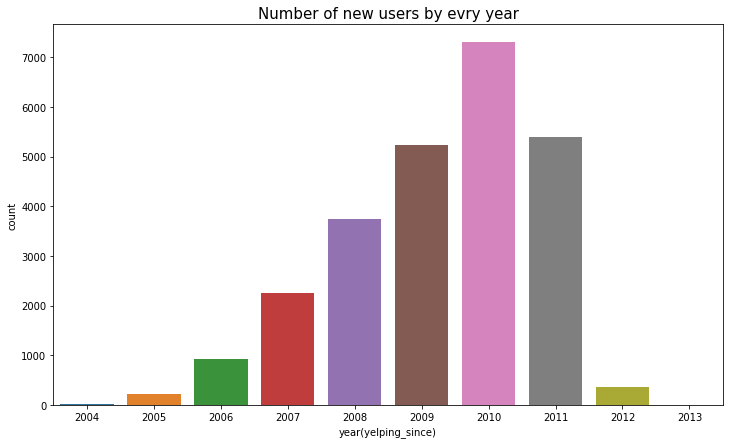

In [41]:
from pyspark.sql.functions import year
df_top_users = yelp_user.select('name',year(yelp_user['yelping_since'])).groupby('year(yelping_since)').count().sort('year(yelping_since)').toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='count',x='year(yelping_since)',data=df_top_users)

plt.title('Number of new users by every year', fontsize=15)
